<a href="https://colab.research.google.com/github/kiet0807/CS114.L21/blob/main/CNN_Clothes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PHÂN LOẠI QUẦN ÁO, GIÀY DÉP**

## **1. GIỚI THIỆU**

Ở thời đại công nghê 4.0 ngày nay thì đã có rất nhiều model được ứng dụng để phân loại các mặt hàng thời trang. 

Ở model này, chúng em làm về vấn đề phân loại quần áo giày dép cụ thể ở là phân làm 10 loại: *Áo thun, quần dài, áo liền quần, đầm, áo khoác, sandal, áo sơ mì, giày, túi xách, ủng*.

## **2. ỨNG DỤNG**

Giúp cho các cửa hàng quần áo, giày dép dễ dàng phân loại các mặt hàng của mình và từ đó có thể quản lí các mặt hàng đó 1 cách chính xác.

## **3. MỤC TIÊU**

Mục tiêu đầu tiên của chúng em khi thực hiện model này là dùng để phân loại các mặt hàng thời trang cụ thể là quần áo và giày dép. 

Và mục tiêu thứ hai của bọn em là từ model này bọn em có được độ chính xác (accuracy) và dộ mất mát (loss) của model khi thực hiện quá trình huấn luyện (train) và kiểm tra (test). Sau đấy, chúng em so sánh tỉ lệ đó với một model tương tự mà chúng em thực hiện song song với model này nhưng dùng một thuật toán khác và rút trích ra lí do.

## **4. THỰC HIỆN**

In [ ]:
#Import thư viện

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import pandas as pd

In [ ]:
# Load bộ dữ liệu bao gồm file train và file test từ thư viện MNIST

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Kích thước tập train

# Tập train có 60000 ảnh với kích thước 28x28
print("x_train shape:", x_train.shape)

# Tương tự, tập train có 60000 label tương ứng với 60000 ảnh
print("y_train shape:", y_train.shape)

# Mỗi label là một số từ 0-9
print("y_train: ", y_train)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
y_train:  [9 0 0 ... 3 0 5]


In [ ]:
# Kích thước tập test

# Tập test cũng có 10000 ảnh và label tương tự như tập train
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("y_test: ", y_test)

x_test shape: (10000, 28, 28)
y_test shape: (10000,)
y_test:  [9 2 1 ... 8 1 5]


In [ ]:
# Xác định label tương ứng từ 0-9

fashion_mnist_labels = ["Áo thun",           # index 0
                        "Quần dài",          # index 1
                        "Áo liền quần",      # index 2 
                        "Đầm",               # index 3 
                        "Áo khoác",          # index 4
                        "Sandal",            # index 5
                        "Áo sơ mi",          # index 6 
                        "Giày",              # index 7 
                        "Túi xách",          # index 8 
                        "Ủng"]               # index 9

In [ ]:
# Reshape hình ảnh về tỉ lệ 28 x 28 x 1

w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

x_test[0].shape

(28, 28, 1)

In [ ]:
# Xử lí để mỗi một điểm ảnh có giá trị từ 0 đến 1

x_train = x_train / 255.0
x_test = x_test / 255.0

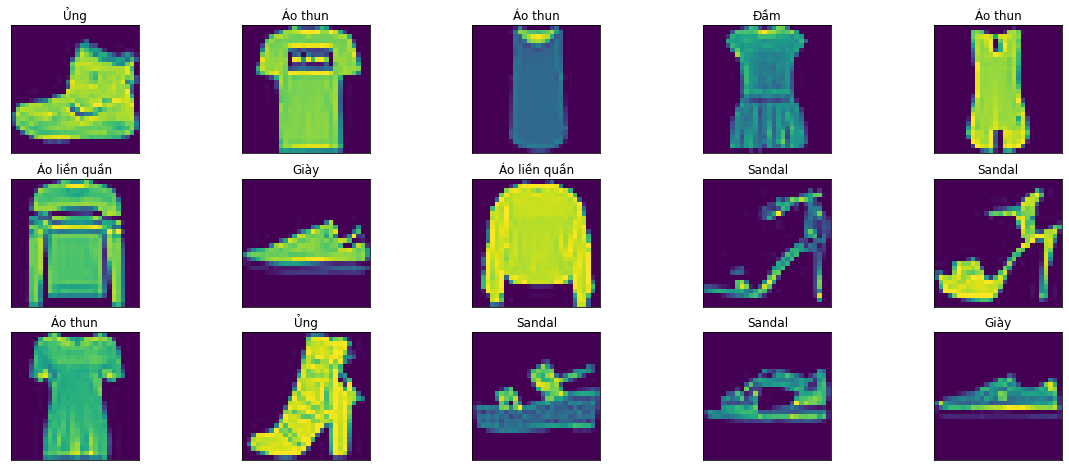

In [ ]:
# In ra 15 ảnh và label từ file train

figure = plt.figure(figsize=(20, 8))
for i in range(15):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(fashion_mnist_labels[y_train[i]]))

In [ ]:
# Set layer

model = tf.keras.Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [ ]:
# Biên dịch model

BATCH_SIZE=1000
EPOCHS = 100

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [ ]:
# Train model

%time history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=1)

Epoch 1/100
48/48 [==============================] - 50s 1s/step - loss: 1.1163 - accuracy: 0.5930 - val_loss: 0.5985 - val_accuracy: 0.7801
Epoch 2/100
48/48 [==============================] - 49s 1s/step - loss: 0.6029 - accuracy: 0.7766 - val_loss: 0.4849 - val_accuracy: 0.8216
Epoch 3/100
48/48 [==============================] - 49s 1s/step - loss: 0.5181 - accuracy: 0.8107 - val_loss: 0.4376 - val_accuracy: 0.8393
Epoch 4/100
48/48 [==============================] - 49s 1s/step - loss: 0.4743 - accuracy: 0.8285 - val_loss: 0.4032 - val_accuracy: 0.8522
Epoch 5/100
48/48 [==============================] - 49s 1s/step - loss: 0.4451 - accuracy: 0.8398 - val_loss: 0.3745 - val_accuracy: 0.8630
Epoch 6/100
48/48 [==============================] - 49s 1s/step - loss: 0.4172 - accuracy: 0.8498 - val_loss: 0.3599 - val_accuracy: 0.8697
Epoch 7/100
48/48 [==============================] - 49s 1s/step - loss: 0.3984 - accuracy: 0.8575 - val_loss: 0.3415 - val_accuracy: 0.8777
Epoch 8/100
4

In [ ]:
# Đánh giá mô hình 

train_loss, train_accuracy = model.evaluate(x_train, y_train, batch_size=BATCH_SIZE)
print("\nTrain Accuracy: " ,train_accuracy)
print("\nTrain Loss: " ,train_loss)

60/60 [==============================] - 12s 202ms/step - loss: 0.1082 - accuracy: 0.9633

Train Accuracy:  0.9632999897003174

Train Loss:  0.10824913531541824


In [ ]:
# Đánh giá mô hình

test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print("\nTest Accuracy: " ,test_accuracy)
print("\nTest Loss: " ,test_loss)

10/10 [==============================] - 2s 205ms/step - loss: 0.2201 - accuracy: 0.9263

Test Accuracy:  0.9262999892234802

Test Loss:  0.22010888159275055


In [ ]:
# Đưa ra dự đoán

predictions = model.predict(x_test)
predictions[0]

array([2.7975582e-13, 1.3920190e-12, 9.4682118e-12, 4.6731456e-11,
       1.6790667e-12, 1.7299343e-06, 2.5781866e-12, 6.8475754e-05,
       1.8582685e-10, 9.9992979e-01], dtype=float32)

In [ ]:
# Kết quả dự đoán

np.argmax(predictions[0])

9

In [ ]:
# Kết quả thực sự

y_test[0]

9

Text(0.5, 1.0, 'Áo khoác 77% (Áo sơ mi)')

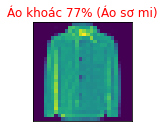

In [ ]:
# In ra 1 hình trong file test đã qua dự đoán

i = 2540
y = plt.subplot(2, 2, 1, xticks=[], yticks=[])
y.imshow(np.squeeze(x_test[i]))

predict_index = np.argmax(predictions[i])
true_index = y_test[i]
y.set_title("{} {:2.0f}% ({})".format(fashion_mnist_labels[predict_index],
                                  100*np.max(predictions[i]), 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Label trong hoặc là kết quả thực sự
# Label có màu đỏ là dự đoán sai, xanh là dự đoán đúng

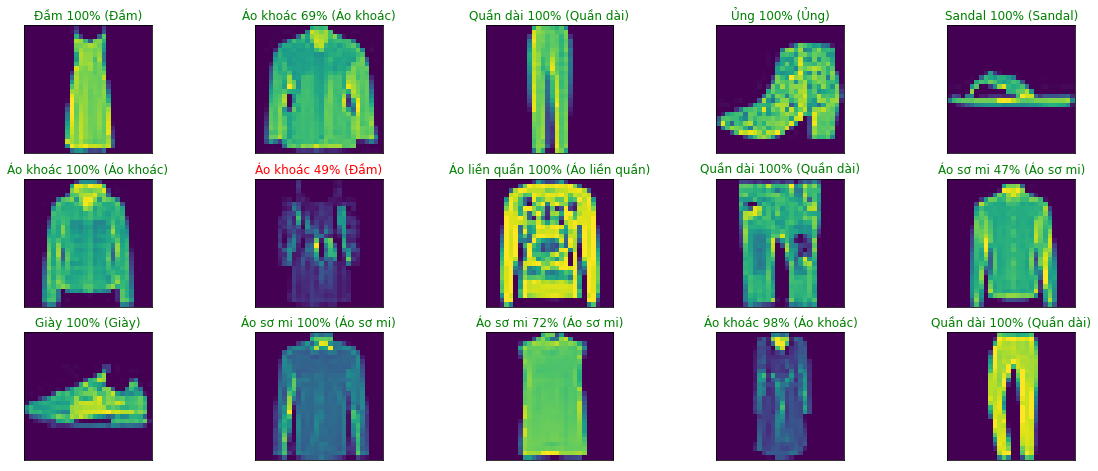

In [ ]:
# In 15 hình ngẫu nhiên trong tập test đã được model dự đoán

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(predictions[index])
    true_index = y_test[index]
    
    ax.set_title("{} {:2.0f}% ({})".format(fashion_mnist_labels[predict_index],
                                  100*np.max(predictions[index]), 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

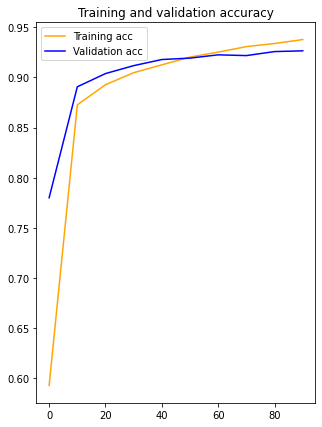

In [ ]:
# Biểu đồ train accuracy và val_accuracy

def plot_history(history, samples=10, init_phase_samples=None):
    epochs = history.params['epochs']
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    every_sample =  int(epochs / samples)
    acc = pd.DataFrame(acc).iloc[::every_sample, :]
    val_acc = pd.DataFrame(val_acc).iloc[::every_sample, :]

    fig, ax = plt.subplots(figsize=(5,7))

    ax.plot(acc, 'b', label='Training acc', color = 'orange')
    ax.plot(val_acc, 'b', label='Validation acc')
    ax.set_title('Training and validation accuracy')
    ax.legend()

plot_history(history)

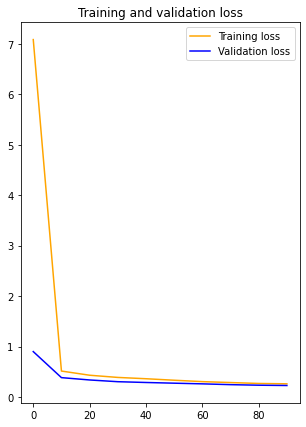

In [ ]:
# Biểu đồ train loss và val_loss

def plot_history(history, samples=10, init_phase_samples=None):
    epochs = history.params['epochs']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    every_sample =  int(epochs / samples)
    loss = pd.DataFrame(loss).iloc[::every_sample, :]
    val_loss = pd.DataFrame(val_loss).iloc[::every_sample, :]

    fig, ax = plt.subplots(figsize=(5,7))

    ax.plot(loss, 'b', label='Training loss', color = 'orange')
    ax.plot(val_loss, 'b', label='Validation loss')
    ax.set_title('Training and validation loss')
    ax.legend()

plot_history(history)

### **Lấy ảnh thực tế từ google để kiểm tra**

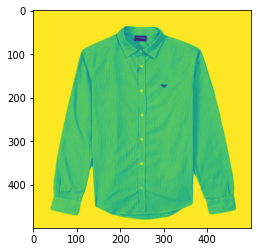

In [91]:
 import cv2

 # Lấy 1 ảnh ngoài thực tế để kiểm tra
img = cv2.imread('aosomi.jpg', 0)
plt.imshow(img)

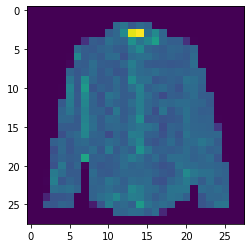

In [92]:
# Điều chỉnh kích thước và màu background cho phù hợp input của model

img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)
plt.imshow(img)
img = img.reshape(-1, 28, 28, 1)

In [93]:
# Cho model dự đoán và kết quả

test_real = model.predict(img)
i = np.argmax(test_real)
fashion_mnist_labels[i]

'Áo sơ mi'